<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 5: Alzheimer's Image Classification

---
## Problem Statement

You are a data science team that has been tasked by the UK government to develop a diagnostic solution that can improve the prediction rates of dementia and Alzheimer's within UK hospitals. Using a Convolutional Neural Network on brain scan imaging, our group wishes to predict Alzheimer's disease with at least 50% accuracy and a recall of at least 64%. This metric is benchmarked to the average diagnostic performance of hospitals across the UK for patients, and an improvement in detection here can mean better outcomes and care for those within its early stages.

---

In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgjXq_fTiHDcfn59uxnrvh00apOJ3ATyiY6bvdW0t5ERM6vukVTNbA
Mounted at /content/drive


In [2]:
# check for GPU connection
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Tensorflow version 2.6.0
Found GPU at: /device:GPU:0


In [12]:
# imports
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

## Neural Network Model Demonstration

### Fine Tuned Basic CNN Model

In [28]:
# Load Model
basic_model = load_model('/content/drive/MyDrive/project-5/tuned-basic-model.h5')

# Load Images
non_demented = load_img('/content/drive/MyDrive/project-5/non-demented.jpg')
mild_demented = load_img('/content/drive/MyDrive/project-5/mild-demented.jpg')
very_mild_demented = load_img('/content/drive/MyDrive/project-5/very-mild-demented.jpg')
moderate_demented = load_img('/content/drive/MyDrive/project-5/moderate-demented.jpg')

# Reshape images
non_demented_img = img_to_array(non_demented) / 255.
mild_demented_img = img_to_array(mild_demented) / 255.
very_mild_demented_img = img_to_array(very_mild_demented) / 255.
moderate_demented_img = img_to_array(moderate_demented) / 255.


non_demented_img = np.expand_dims(non_demented_img, axis=0)
mild_demented_img = np.expand_dims(mild_demented_img, axis=0)
very_mild_demented_img = np.expand_dims(very_mild_demented_img, axis=0)
moderate_demented_img = np.expand_dims(moderate_demented_img, axis=0)

# check image shape
non_demented_img.shape

(1, 208, 176, 3)

In [29]:
# create and store predictions
with tf.device('/device:GPU:0'):
  non_demented_pred = basic_model.predict(non_demented_img)
  mild_demented_pred = basic_model.predict(mild_demented_img)
  very_mild_demented_pred = basic_model.predict(very_mild_demented_img)
  moderate_demented_pred = basic_model.predict(moderate_demented_img)

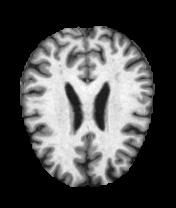

In [30]:
non_demented

In [31]:
# Non-Demented Predictions
pd.DataFrame(non_demented_pred, columns=['Mild Demented', 'Moderate Demented', 'Non-Demented', 'Very Mild Demented'])

,Mild Demented,Moderate Demented,Non-Demented,Very Mild Demented
0,7.532054e-08,8.357886e-13,0.000046,0.999954


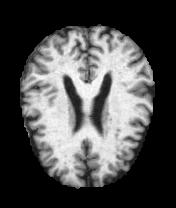

In [32]:
mild_demented

In [33]:
# Mild Demented Predictions
pd.DataFrame(mild_demented_pred, columns=['Mild Demented', 'Moderate Demented', 'Non-Demented', 'Very Mild Demented'])

,Mild Demented,Moderate Demented,Non-Demented,Very Mild Demented
0,0.998398,5.975327e-15,0.001602,4.231979e-08


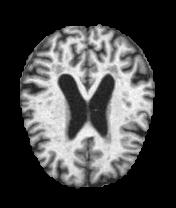

In [34]:
very_mild_demented

In [35]:
# Very Mild Demented Predictions
pd.DataFrame(very_mild_demented_pred, columns=['Mild Demented', 'Moderate Demented', 'Non-Demented', 'Very Mild Demented'])

,Mild Demented,Moderate Demented,Non-Demented,Very Mild Demented
0,1.684292e-18,1.203045e-31,2.118769e-15,1.0


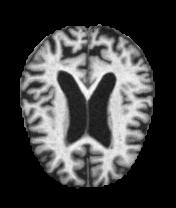

In [27]:
moderate_demented

In [23]:
# Moderate Demented Predictions
pd.DataFrame(moderate_demented_pred, columns=['Mild Demented', 'Moderate Demented', 'Non-Demented', 'Very Mild Demented'])

,Mild Demented,Moderate Demented,Non-Demented,Very Mild Demented
0,0.000438,0.999561,2.706186e-08,3.614403e-07
